# Imports

In [120]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import folium
import pycountry
from shapely import wkt
import networkx as nx
import dill
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import ast
import utils_pre_processing as upp
from utils_pre_processing import split_col_to_and_from
# Show all columns when using .head()
pd.set_option('display.max_columns', None)

# Reading data

In [121]:
iggielgn_borderpoints = pd.read_csv('IGGIELGN/IGGIELGN_BorderPoints.csv', delimiter=';')
iggielgn_compressors = pd.read_csv('IGGIELGN/IGGIELGN_Compressors.csv', delimiter=';')
iggielgn_consumers = pd.read_csv('IGGIELGN/IGGIELGN_Consumers.csv', delimiter=';')
iggielgn_lngs = pd.read_csv('IGGIELGN/IGGIELGN_LNGs.csv', delimiter=';')
iggielgn_nodes = pd.read_csv('IGGIELGN/IGGIELGN_Nodes.csv', delimiter=';')
iggielgn_pipesegments = pd.read_csv('IGGIELGN/IGGIELGN_PipeSegments.csv', delimiter=';')
iggielgn_productions = pd.read_csv('IGGIELGN/IGGIELGN_Productions.csv', delimiter=';')
iggielgn_storages = pd.read_csv('IGGIELGN/IGGIELGN_Storages.csv', delimiter=';')

# Pre-processing columns

## Pipe Segments

In [122]:
# Expanding param, uncertainty and method columns
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'param')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'uncertainty', 'uncertainty_')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'method', 'method_')

# Splitting node_id, country_code, lat and long columns
iggielgn_pipesegments = upp.split_col_to_and_from(iggielgn_pipesegments, 'node_id', 'str')
iggielgn_pipesegments = upp.split_col_to_and_from(iggielgn_pipesegments, 'country_code', 'str')
iggielgn_pipesegments = upp.split_coords(iggielgn_pipesegments, 'lat')
iggielgn_pipesegments = upp.split_coords(iggielgn_pipesegments, 'long')

iggielgn_pipesegments.head()

,id,name,source_id,comment,tags,diameter_mm,end_year,is_H_gas,is_bothDirection,lat_mean,length_km,long_mean,max_cap_M_m3_per_d,max_pressure_bar,nuts_id_1,nuts_id_2,nuts_id_3,path_lat,path_long,start_year,uncertainty_diameter_mm,uncertainty_end_year,uncertainty_is_H_gas,uncertainty_is_bothDirection,uncertainty_lat_mean,uncertainty_length_km,uncertainty_long_mean,uncertainty_max_cap_M_m3_per_d,uncertainty_max_pressure_bar,uncertainty_nuts_id_1,uncertainty_nuts_id_2,uncertainty_nuts_id_3,uncertainty_path_lat,uncertainty_path_long,uncertainty_start_year,method_diameter_mm,method_end_year,method_is_H_gas,method_is_bothDirection,method_lat_mean,method_length_km,method_long_mean,method_max_cap_M_m3_per_d,method_max_pressure_bar,method_nuts_id_1,method_nuts_id_2,method_nuts_id_3,method_path_lat,method_path_long,method_start_year,from_node_id,to_node_id,from_country_code,to_country_code,from_lat,to_lat,from_long,to_long
0,INET_PL_273_EE_0_Seg_0_Seg_0,INET_PL_273_EE_0_Seg_0_Seg_0,['INET_PL_273'],NaN,{},1420.0,None,1,0,53.002837,110.841205,23.068740,90.410959,84.0,"['PL8', 'PL8']","['PL84', 'PL84']","['PL841', 'PL842']","[53.01176, 53.00427, 52.99535]","[23.48243, 23.06858, 22.65489]",1999.0,0.0,NaN,0.0,0.5,0.016408,0.2,0.827514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,raw,None,raw,make_Attrib(const),make_Attrib(latlong_mean),fill_length(PipeSegments),make_Attrib(latlong_mean),raw,raw,make_Attrib(const),make_Attrib(const),make_Attrib(const),K_Netze.make_path_latlong(lat),K_Netze.make_path_latlong(lat),raw,INET_N_855,INET_N_1828,PL,PL,53.017810,52.984994,23.896413,22.241386
1,INET_PL_273_EE_1_Seg_0_Seg_0,INET_PL_273_EE_1_Seg_0_Seg_0,['INET_PL_273'],NaN,{},1420.0,None,1,0,52.934620,109.322286,21.430104,90.410959,84.0,"['PL8', 'PL9']","['PL84', 'PL92']","['PL842', 'PL922']","[52.96119, 52.936, 52.90943]","[21.83527, 21.42962, 21.02445]",1999.0,0.0,NaN,0.0,0.5,0.051755,0.2,0.810795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,raw,None,raw,make_Attrib(const),make_Attrib(latlong_mean),fill_length(PipeSegments),make_Attrib(latlong_mean),raw,raw,make_Attrib(const),make_Attrib(const),make_Attrib(const),K_Netze.make_path_latlong(lat),K_Netze.make_path_latlong(lat),raw,INET_N_1828,INET_N_329,PL,PL,52.984994,52.881484,22.241386,20.619795
2,INET_PL_357_Seg_0_Seg_0,INET_PL_357_Seg_0_Seg_0,['INET_PL_357'],NaN,{},1219.0,None,1,1,46.504630,13.533434,13.504430,101.066573,70.0,"['ITH', 'ITH']","['ITH4', 'ITH4']","['ITH42', 'ITH42']",[],[],NaN,0.0,NaN,0.0,NaN,0.000898,0.5,0.088376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,raw,None,raw,None,make_Attrib(latlong_mean),fill_length(PipeSegments),make_Attrib(latlong_mean),M_Heuristics.app_Phys_Heur_Move_Capacity(),raw,make_Attrib(const),make_Attrib(const),make_Attrib(const),K_Netze.make_path_latlong(lat),K_Netze.make_path_latlong(lat),None,INET_N_1612,INET_N_1009,IT,IT,46.505528,46.503733,13.592806,13.416054
3,INET_PL_359_Seg_0_Seg_0,INET_PL_359_Seg_0_Seg_0,['INET_PL_359'],NaN,{},1066.8,None,1,1,46.504630,13.533434,13.504430,101.066573,70.0,"['ITH', 'ITH']","['ITH4', 'ITH4']","['ITH42', 'ITH42']",[],[],NaN,0.0,NaN,0.0,NaN,0.000898,0.5,0.088376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,raw,None,raw,None,make_Attrib(latlong_mean),fill_length(PipeSegments),make_Attrib(latlong_mean),M_Heuristics.app_Phys_Heur_Move_Capacity(),raw,make_Attrib(const),make_Attrib(const),make_Attrib(const),K_Netze.make_path_latlong(lat),K_Netze.make_path_latlong(lat),None,INET_N_1612,INET_N_1009,IT,IT,46.505528,46.503733,13.592806,13.416054
4,INET_PL_361_Seg_0_Seg_0,INET_PL_361_Seg_0_Seg_0,['INET_PL_361'],NaN,{},1219.0,None,1,1,46.504630,13.533434,13.504430,101.066573,70.0,"['ITH', 'ITH']","['ITH4', 'ITH4']","['ITH42', 'ITH42']",[],[],NaN,0.0,NaN,0.0,NaN,0.000898,0.5,0.088376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,raw,None,raw,None,make_Attrib(latlong_mean),fill_length(PipeSegments),make_Attrib(latlong_mean),M_Heuristics.app_Phys_Heur_Move_Capacity(),raw,make_Attrib(const),make_Attrib(const),make_Attrib(const),K_Netze.make_path_latlong(lat),K_Netze.make_path_latlong(lat),None,INET_N_161

## Border Points

In [123]:
# Convert values in the node_id col of iggielgn_borderpoints from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_borderpoints['node_id'] = iggielgn_borderpoints['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Rename the country_code column to country_code_node
iggielgn_borderpoints.rename(columns={'country_code': 'country_code_node'}, inplace=True)

# Expanding param, uncertainty and method columns
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'param')
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'uncertainty', 'uncertainty_')
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'method', 'method_')

## Compressors

In [124]:
# Convert values in the node_id col of iggielgn_compressors from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_compressors['node_id'] = iggielgn_compressors['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'param')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'uncertainty', 'uncertainty_')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'method', 'method_')

## LNGs

In [125]:
# Convert values in the node_id col of iggielgn_lngs from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_lngs['node_id'] = iggielgn_lngs['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'param')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'uncertainty', 'uncertainty_')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'method', 'method_')

## Consumers

In [126]:
# Convert values in the node_id col of iggielgn_consumers from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_consumers['node_id'] = iggielgn_consumers['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'param')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'uncertainty', 'uncertainty_')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'method', 'method_')

## Productions

In [127]:
# Convert values in the node_id col of iggielgn_productions from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_productions['node_id'] = iggielgn_productions['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'param')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'uncertainty', 'uncertainty_')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'method', 'method_')

## Storages

In [128]:
# Convert values in the node_id col of iggielgn_storages from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_storages['node_id'] = iggielgn_storages['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'param')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'uncertainty', 'uncertainty_')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'method', 'method_')

## Nodes

In [129]:
# Expanding param, uncertainty and method columns
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'param')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'uncertainty', 'uncertainty_')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'method', 'method_')

# Add a type column to iggielgn_nodes
iggielgn_nodes['type'] = ''

# Populate the type column of iggielgn_consumers, based on whether the id of the node is in the node_id column of iggielgn_consumers, iggielgn_productions, or iggielgn_storages
for row in iggielgn_nodes.itertuples():
    if row.id in iggielgn_consumers['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'consumer'
    elif row.id in iggielgn_productions['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'production'
    elif row.id in iggielgn_storages['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'storage'
    elif row.id in iggielgn_compressors['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'compressor'
    elif row.id in iggielgn_lngs['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'lng'
    elif row.id in iggielgn_borderpoints['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'borderpoint'
    else:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = 'node'

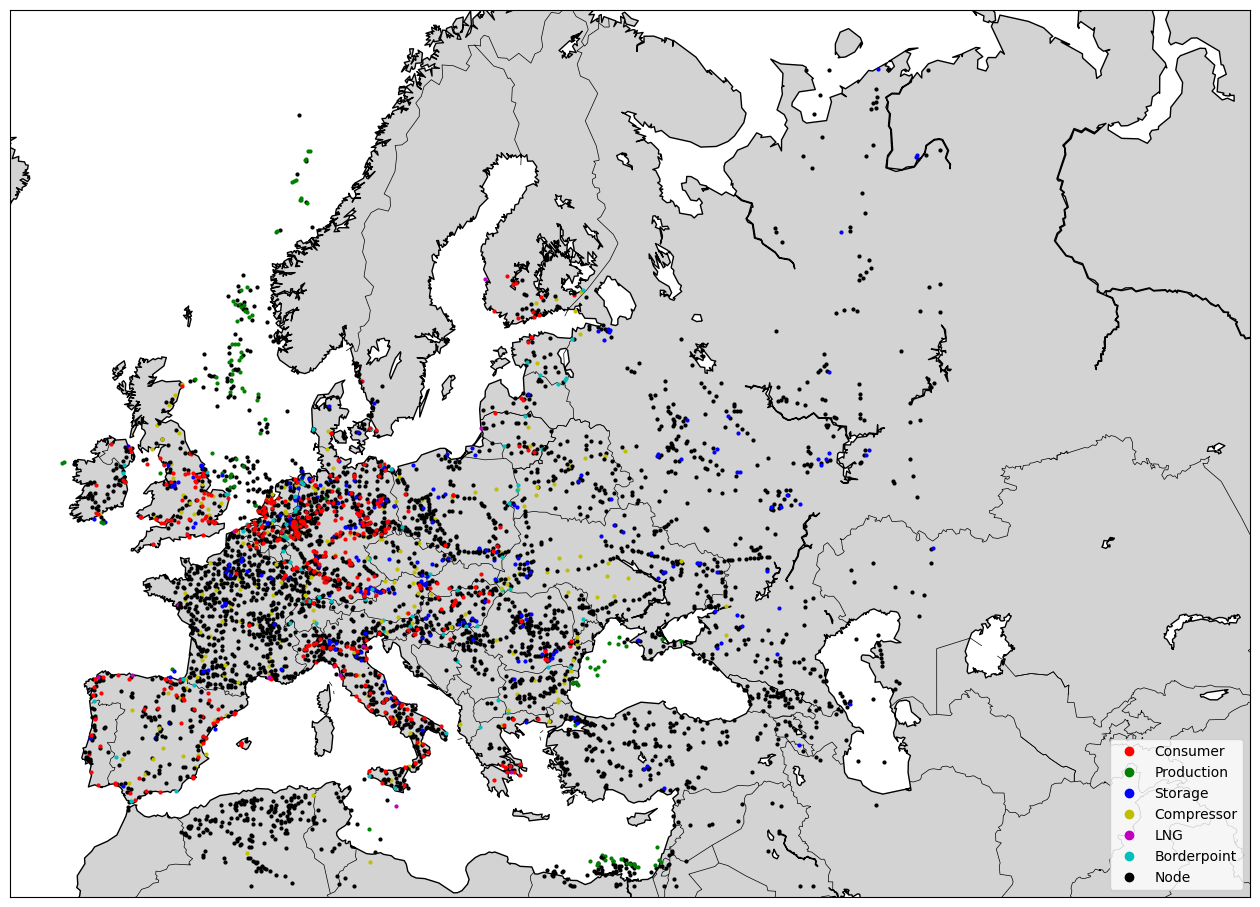

In [130]:
# Plot the nodes on the map
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the type
for row in iggielgn_nodes.itertuples():
    x, y = m(row.long, row.lat)
    if row.type == 'consumer':
        m.plot(x, y, 'ro', markersize=2)
    elif row.type == 'production':
        m.plot(x, y, 'go', markersize=2)
    elif row.type == 'storage':
        m.plot(x, y, 'bo', markersize=2)
    elif row.type == 'compressor':
        m.plot(x, y, 'yo', markersize=2)
    elif row.type == 'lng':
        m.plot(x, y, 'mo', markersize=2)
    elif row.type == 'borderpoint':
        m.plot(x, y, 'co', markersize=2)
    else:
        m.plot(x, y, 'ko', markersize=2)

# Add legend
plt.plot([], [], 'ro', label='Consumer')
plt.plot([], [], 'go', label='Production')
plt.plot([], [], 'bo', label='Storage')
plt.plot([], [], 'yo', label='Compressor')
plt.plot([], [], 'mo', label='LNG')
plt.plot([], [], 'co', label='Borderpoint')
plt.plot([], [], 'ko', label='Node')
plt.legend()

plt.show()

In [131]:
# Create a directed multigraph
G_multi_directed = nx.MultiDiGraph()

# Add the nodes to the graph
for row in iggielgn_nodes.itertuples():
    G_multi_directed.add_node(row.id, lat=row.lat, long=row.long, type=row.type)

# Add the edges to the graph
for row in iggielgn_pipesegments.itertuples():
    G_multi_directed.add_edge(row.from_node_id, row.to_node_id, capacity=row.max_cap_M_m3_per_d)

In [132]:
# Create a simple directed graph, a multi undirected graph, and a simple undirected graph from the directed multigraph
G_simple_directed = nx.DiGraph(G_multi_directed)
G_multi_undirected = nx.MultiGraph(G_multi_directed)
G_simple_undirected = nx.Graph(G_multi_directed)

In [133]:
# Saving the multi di-graph to a pickle file
with open('graph_objects/G_multi_directed_iggielgn_iggielgn.pickle', 'wb') as file:
    dill.dump(G_multi_directed, file)

# Saving the simple di-graph to a pickle file
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'wb') as file:
    dill.dump(G_simple_directed, file)

# Saving the multi un-graph to a pickle file
with open('graph_objects/G_multi_undirected_iggielgn.pickle', 'wb') as file:
    dill.dump(G_multi_undirected, file)

# Saving the simple un-graph to a pickle file
with open('graph_objects/G_simple_undirected_iggielgn.pickle', 'wb') as file:
    dill.dump(G_simple_undirected, file)

In [134]:
# Print the number of edges and nodes in each of the four graphs
print("Number of edges and nodes in the four graphs:")
print("G:", G_multi_directed.number_of_edges(), G_multi_directed.number_of_nodes())
print("G_simple_directed:", G_simple_directed.number_of_edges(), G_simple_directed.number_of_nodes())
print("G_multi_undirected:", G_multi_undirected.number_of_edges(), G_multi_undirected.number_of_nodes())
print("G_simple_undirected:", G_simple_undirected.number_of_edges(), G_simple_undirected.number_of_nodes())

Number of edges and nodes in the four graphs:
G: 6323 4675
G_simple_directed: 5826 4675
G_multi_undirected: 6160 4675
G_simple_undirected: 5673 4675


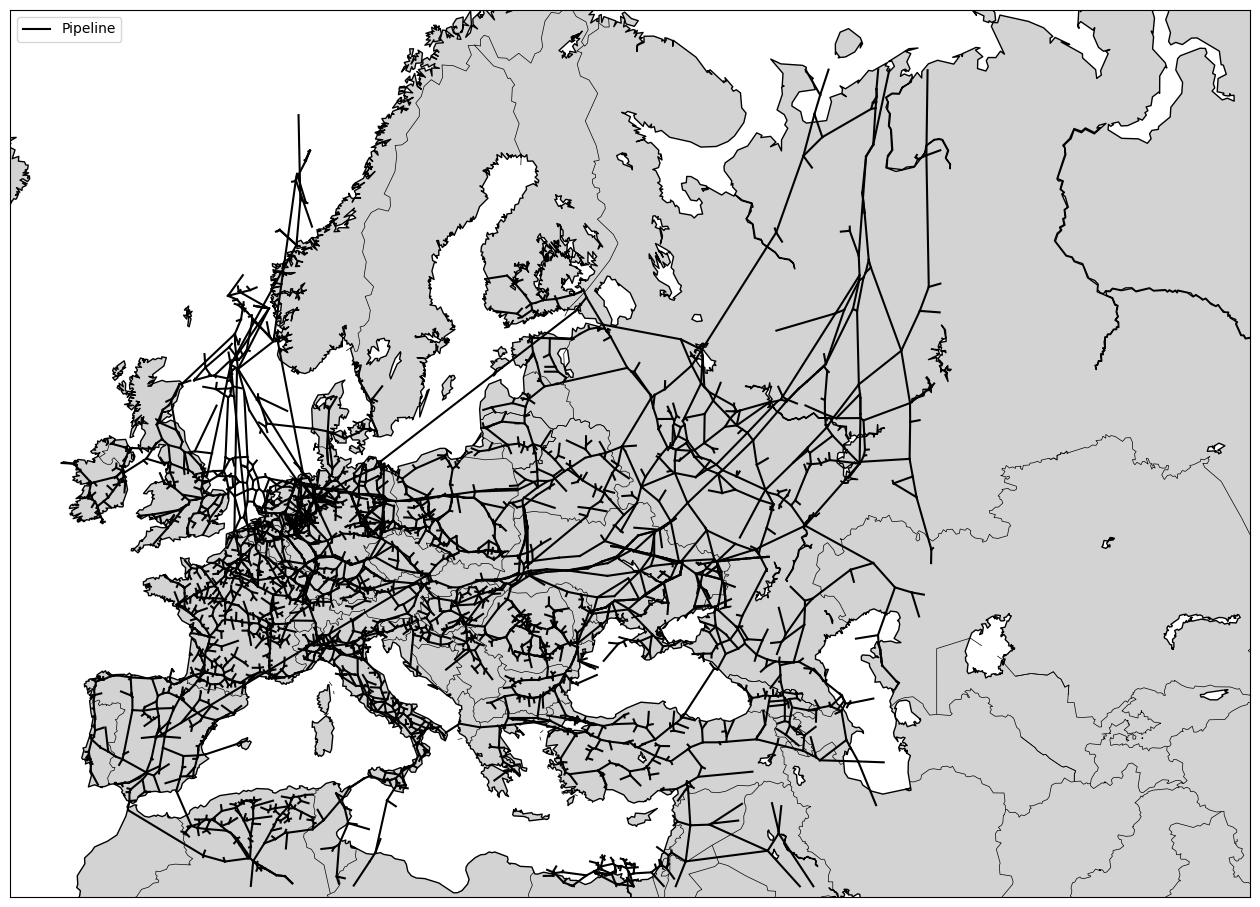

In [135]:
# Plot the graph
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the edges
for edge in G_multi_directed.edges():
    node1 = G_multi_directed.nodes[edge[0]]
    node2 = G_multi_directed.nodes[edge[1]]
    x1, y1 = m(node1['long'], node1['lat'])
    x2, y2 = m(node2['long'], node2['lat'])
    m.plot([x1, x2], [y1, y2], 'k-')


# Add legend
plt.plot([], [], 'k-', label='Pipeline')
plt.legend()

plt.show()

In [136]:
# Ouput the connected components of the graph
connected_components = list(nx.weakly_connected_components(G_multi_directed))
connected_components_sizes = [len(comp) for comp in connected_components]
connected_components_sizes.sort(reverse=True)
print(connected_components_sizes)

[4643, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


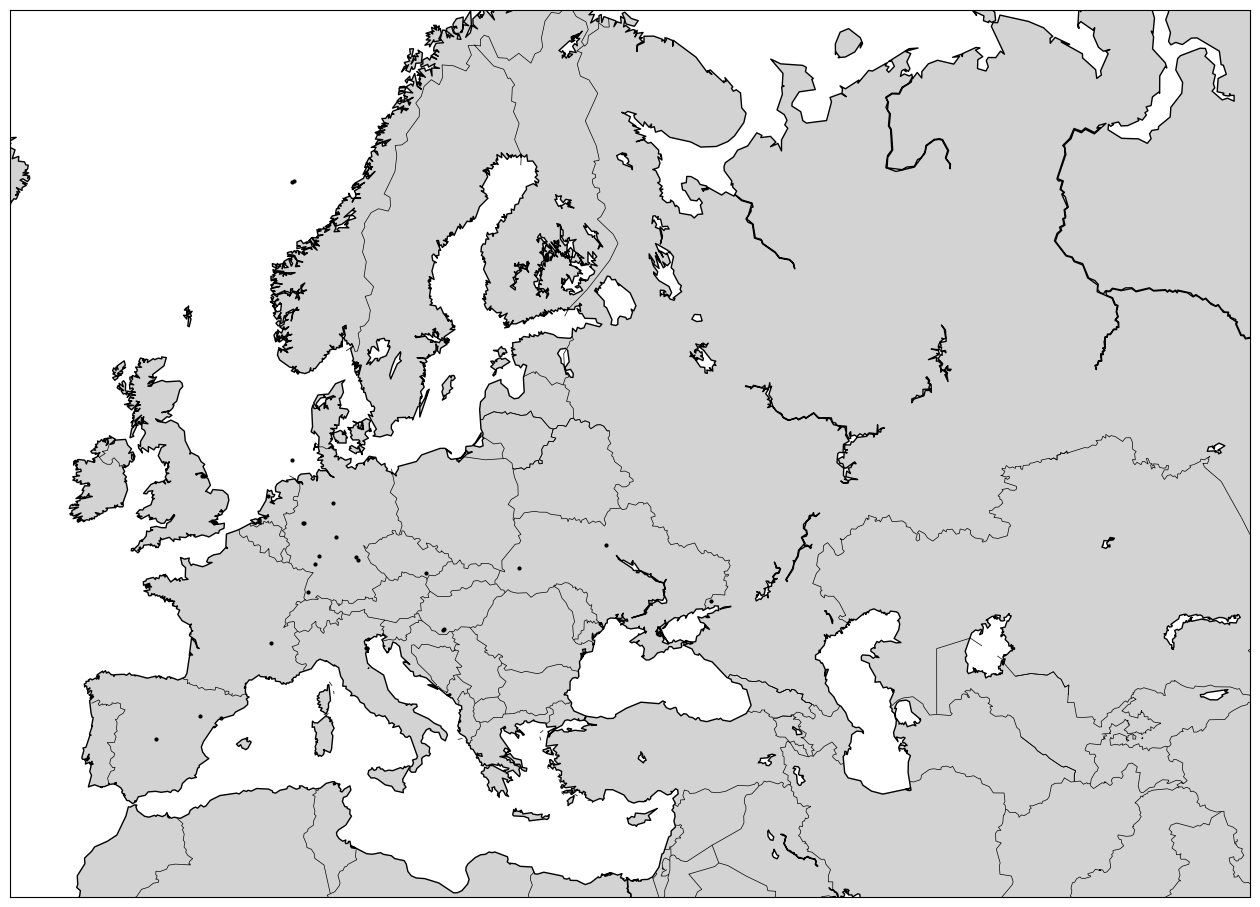

In [137]:
# Only plot nodes not in the largest connected component
largest_component = connected_components[0]
non_largest_component_nodes = [node for node in G_multi_directed.nodes() if node not in largest_component]

# Plot the nodes on the map, and color based on the component id
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the component id
for row in iggielgn_nodes.itertuples():
    if row.id in non_largest_component_nodes:
        x, y = m(row.long, row.lat)
        m.plot(x, y, 'ko', markersize=2)

plt.show()

<Axes: >

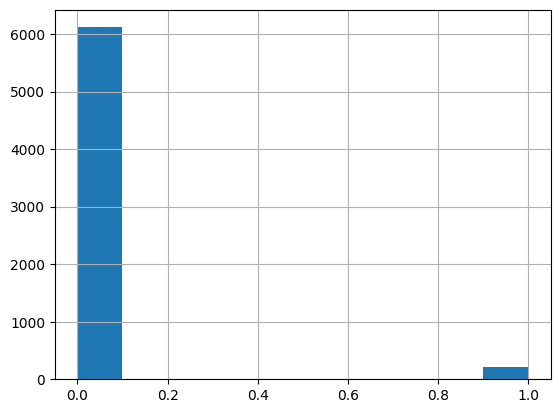

In [138]:
# Plot a histogram for the is_bothDirection in the iggielgn_pipesegments dataframe
iggielgn_pipesegments['is_bothDirection'].hist()

In [139]:
# Output the data of one edge in the graph
print(list(G_multi_directed.nodes(data=True))[0])
print(list(G_multi_directed.edges(data=True))[0])

('INET_N_855', {'lat': 53.01781, 'long': 23.896413, 'type': 'compressor'})
('INET_N_855', 'INET_N_1828', {'capacity': 90.4109589})


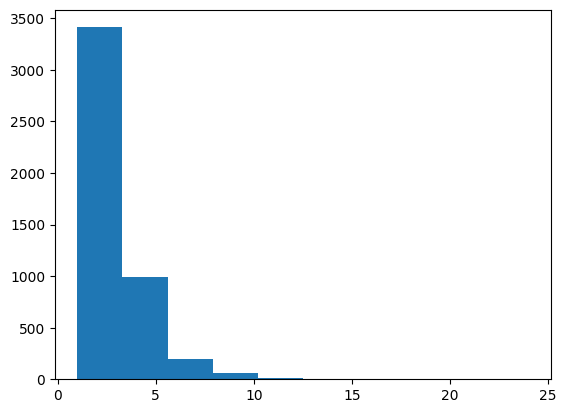

In [140]:
# Show the degree distribution of the graph
degrees = [G_multi_directed.degree(node) for node in G_multi_directed.nodes()]
plt.hist(degrees)
plt.show()

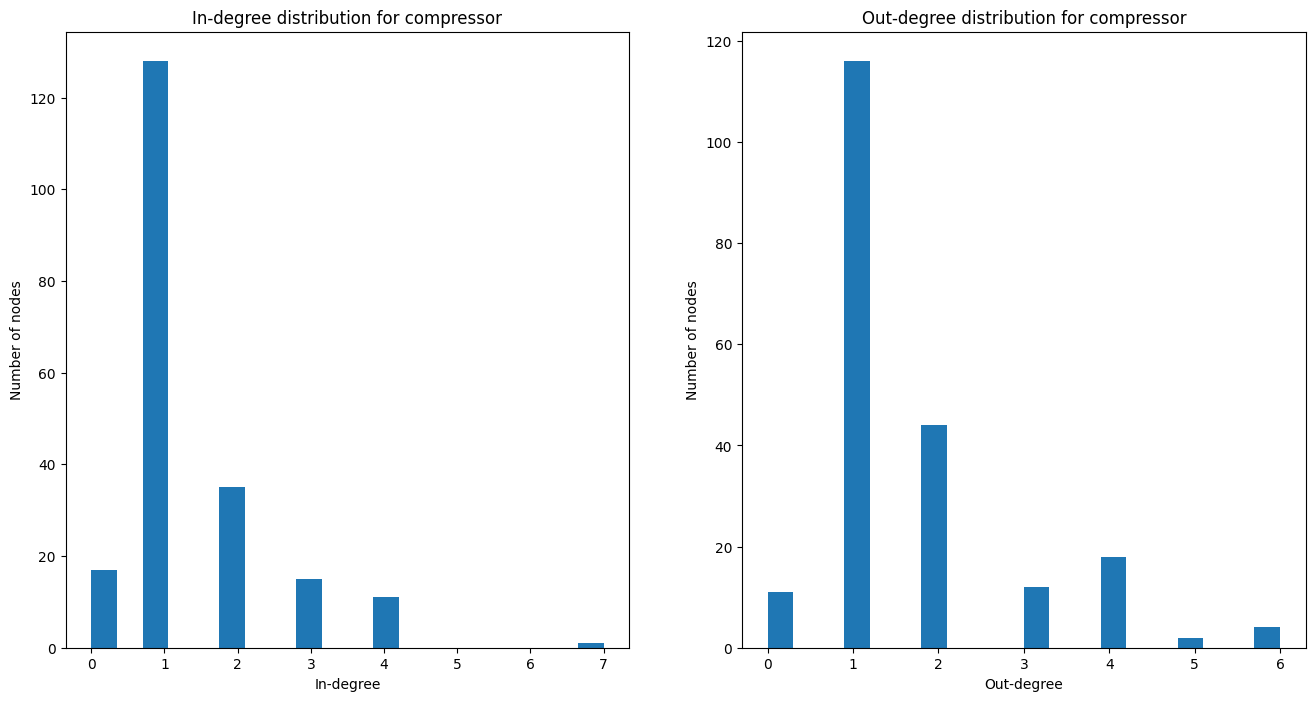

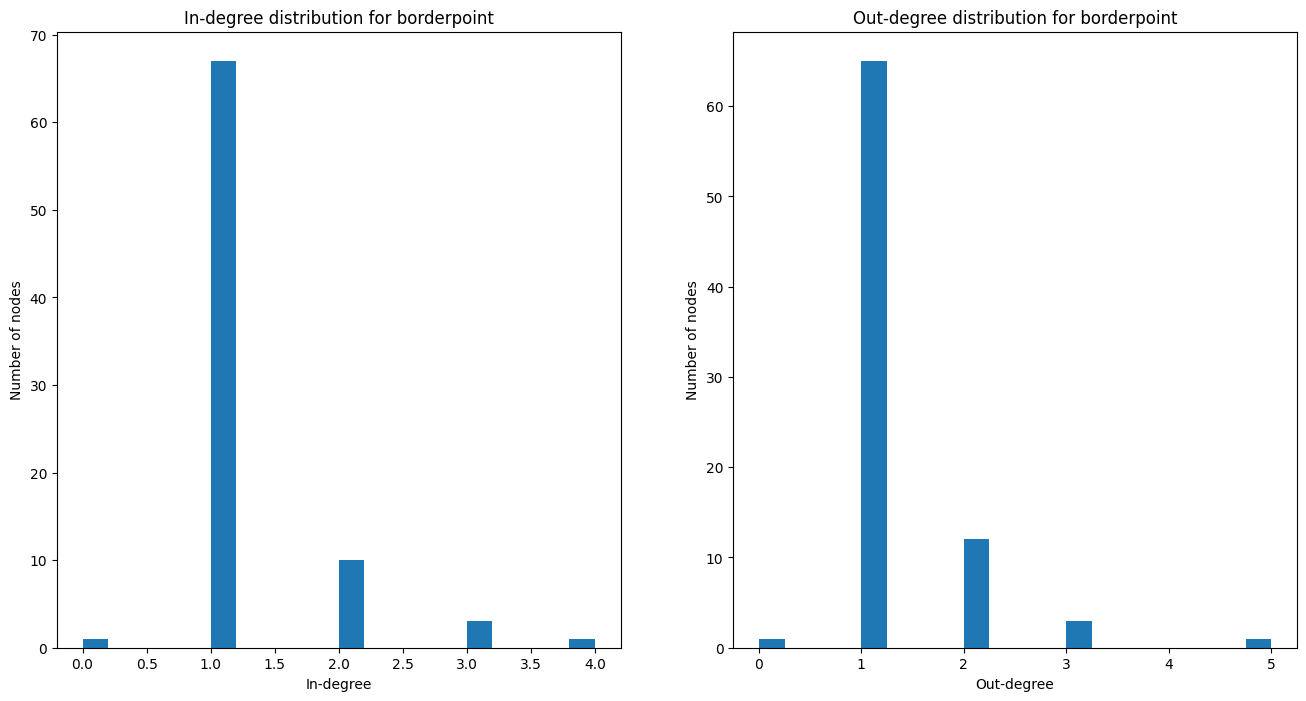

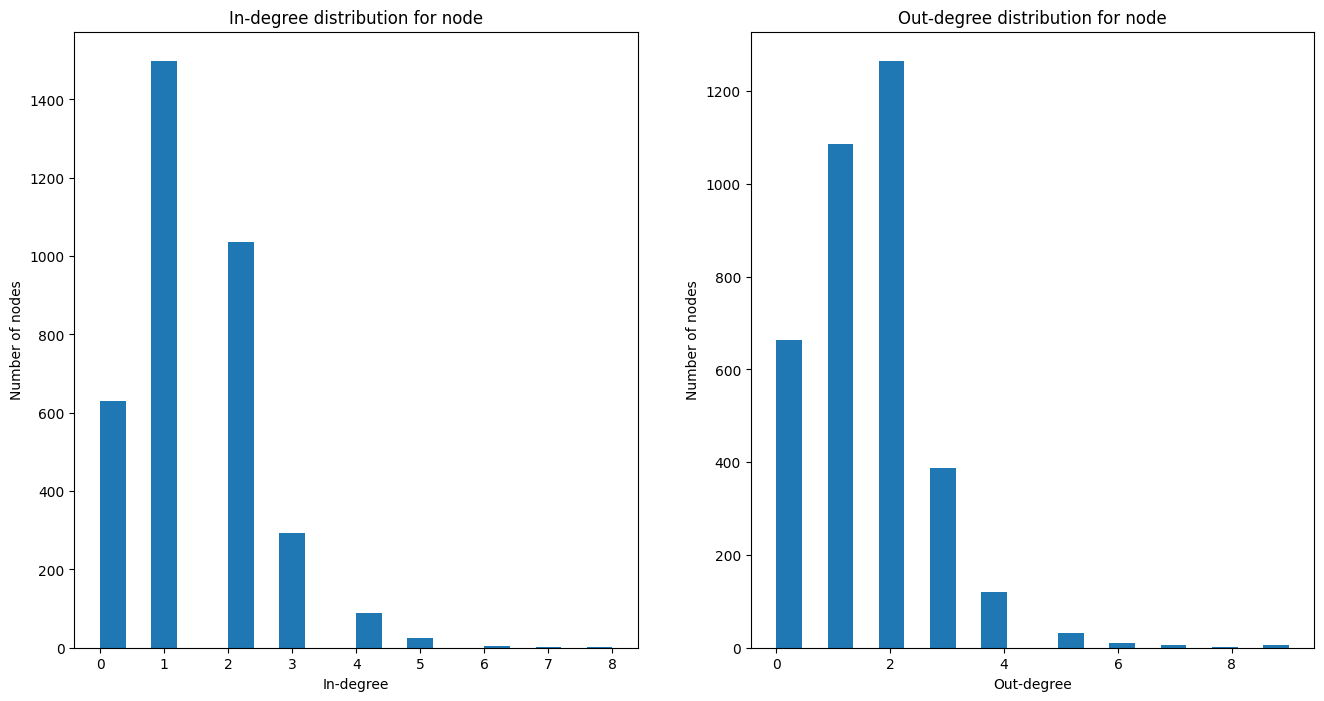

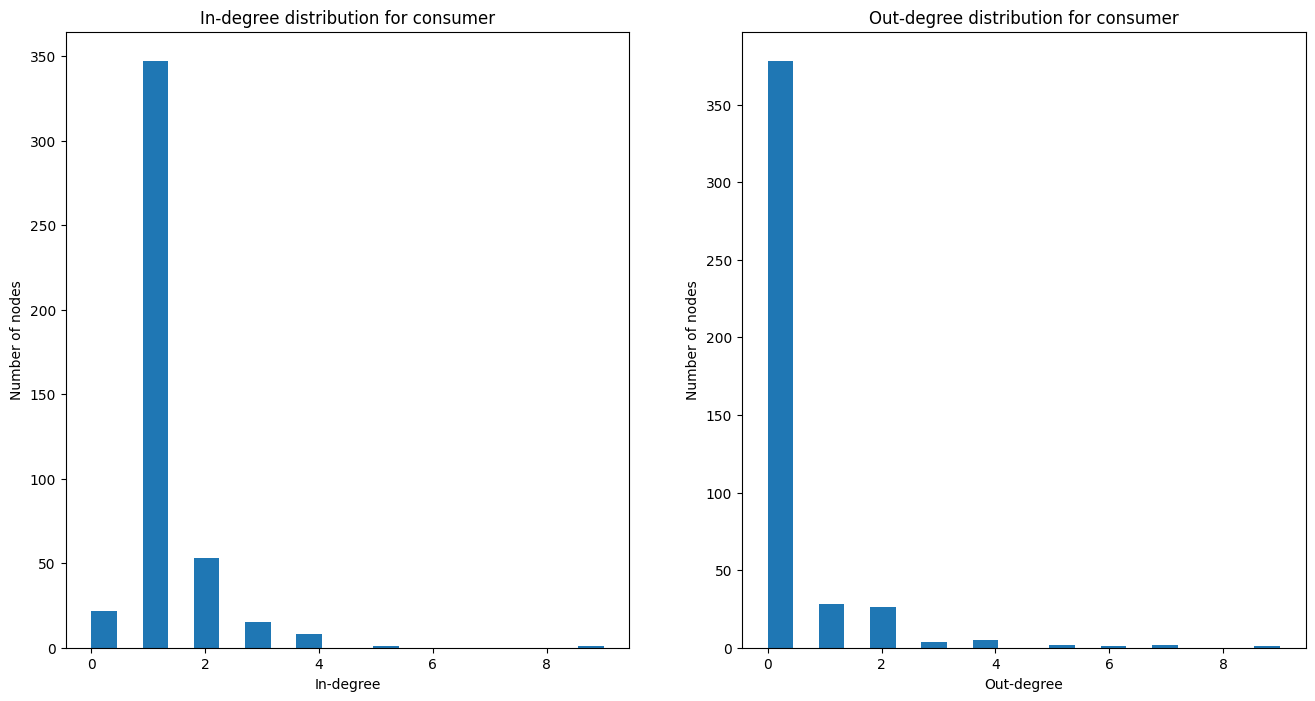

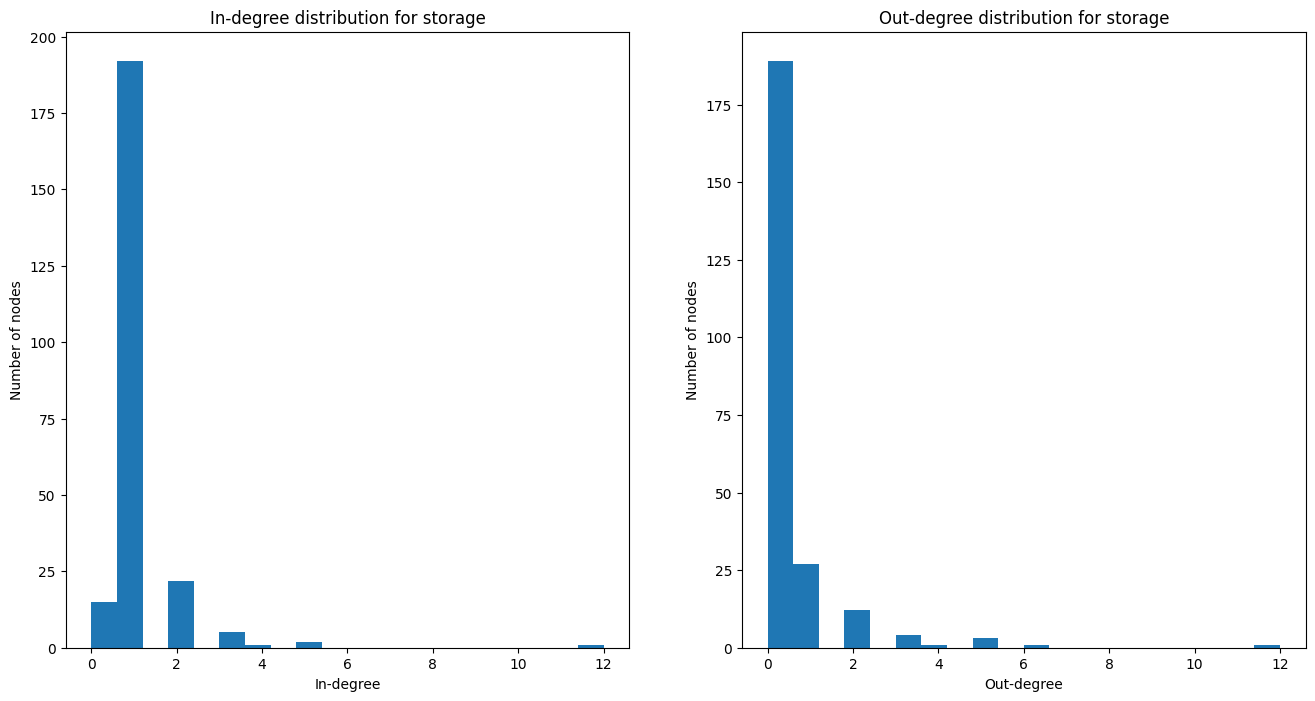

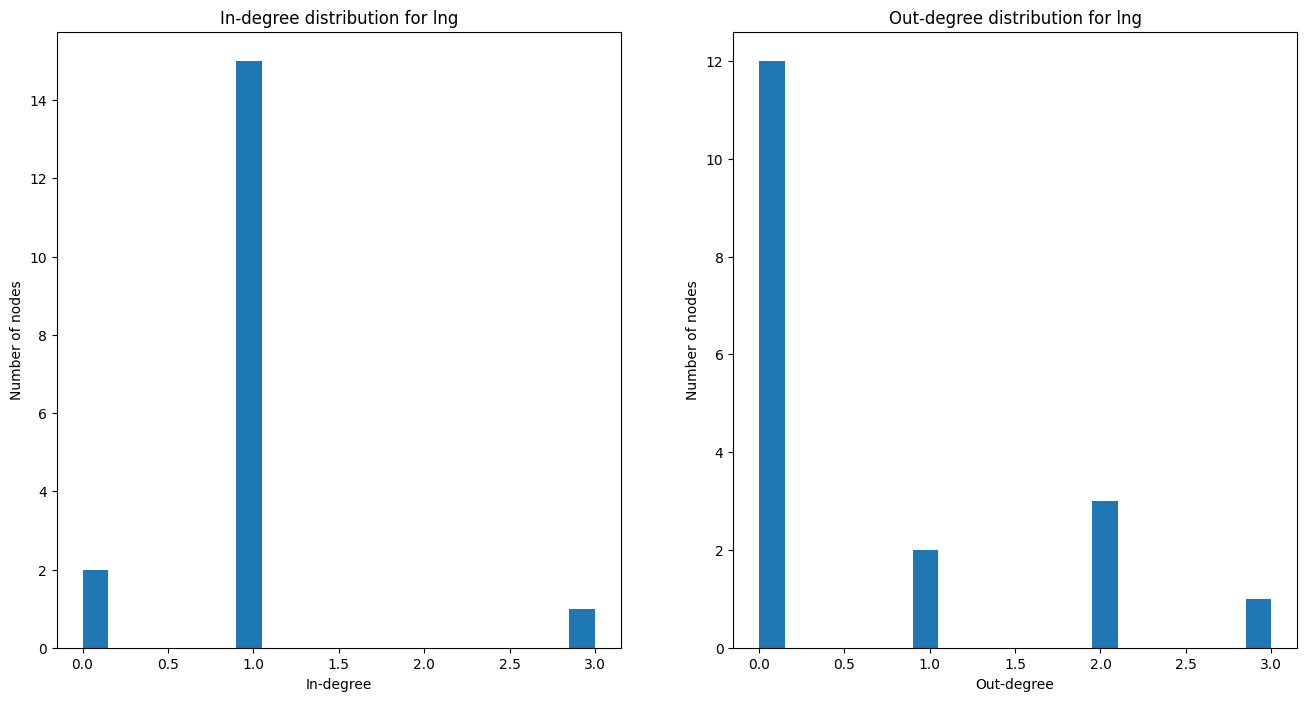

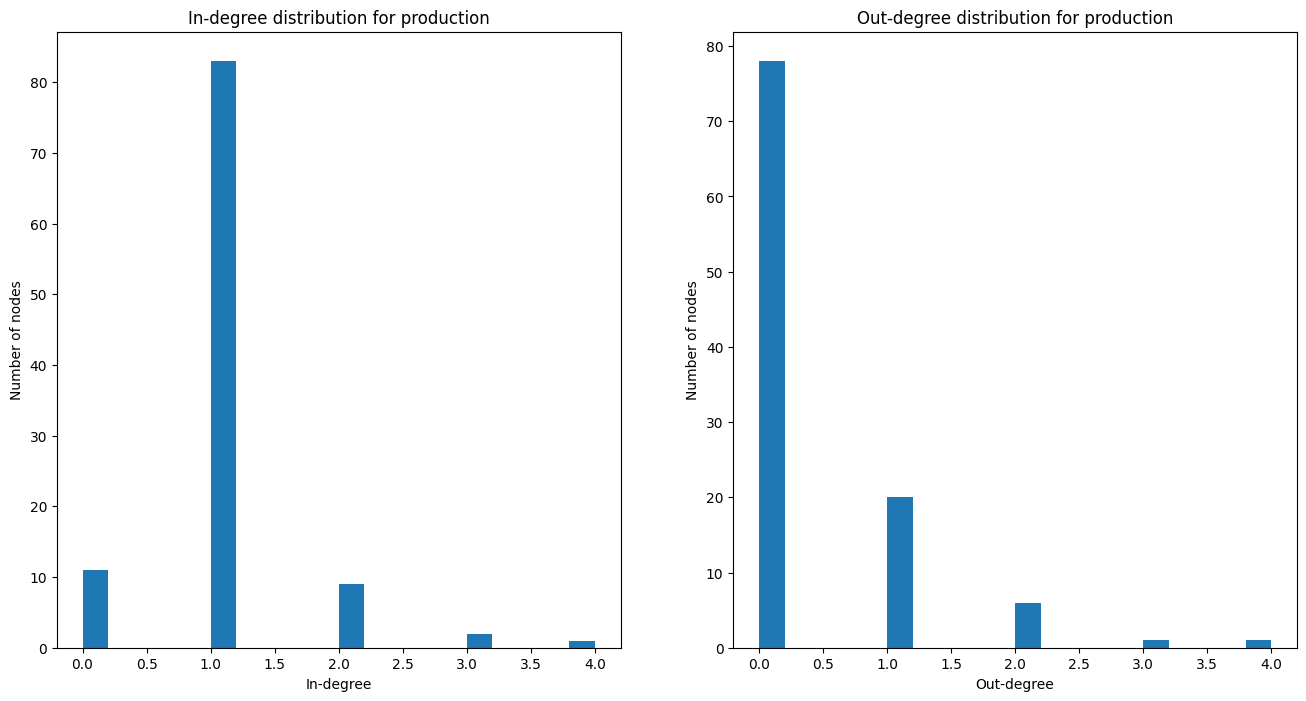

In [141]:
# Plot the in- and out-degree distribution for each node type using a bar chart, where the x-asis it the degree and the y-axis is the number of nodes with that degree
node_types = iggielgn_nodes['type'].unique()
for node_type in node_types:
    nodes_of_type = iggielgn_nodes[iggielgn_nodes['type'] == node_type]
    in_degrees = [G_multi_directed.in_degree(node) for node in nodes_of_type['id']]
    out_degrees = [G_multi_directed.out_degree(node) for node in nodes_of_type['id']]
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.hist(in_degrees, bins=20)
    plt.title(f'In-degree distribution for {node_type}')
    plt.xlabel('In-degree')
    plt.ylabel('Number of nodes')
    plt.subplot(1, 2, 2)
    plt.hist(out_degrees, bins=20)
    plt.title(f'Out-degree distribution for {node_type}')
    plt.xlabel('Out-degree')
    plt.ylabel('Number of nodes')
    plt.show()
